# Download and prepare MNIST dataset

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

In [1]:
# Import Libraries
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import datasets, layers, models
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [2]:
# Download and prepare the MNIST dataset
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1  
# Here we are Normalizing the data to achieve a standardized data format across your entire system such that the range of pixel values in one input image are the same as the range in another image
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.02)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


(60000, 28, 28)


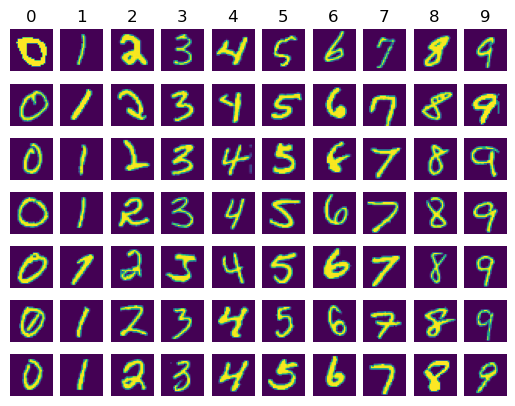

In [6]:
# classes for title
# num classes for amount of examples
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(x_train.shape)
num_classes = len(classes)
samples_per_class = 7
plt.figure(0)
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        # plt.imshow(x_train[idx].astype('uint8'))
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Write a simple CNN network for classifying images



In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)  
y_train = to_categorical(y_train, num_classes = 10)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1) 
y_test = to_categorical(y_test, num_classes = 10)
print("Train size:{}\nTrain label:{}\nTest size:{}\nTest label:{}".format(x_train.shape,y_train.shape,x_test.shape, y_test.shape))


Train size:(60000, 28, 28, 1)
Train label:(60000, 10)
Test size:(10000, 28, 28, 1)
Test label:(10000, 10)


We used the Keras Sequential API, where we have to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. We chose to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end we used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

In [8]:
# Set the CNN model 
# CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout-> Output

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [9]:
# Define the optimizer
#optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [10]:
# Compile the model
model.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In order to make the optimizer converge faster and closest to the global minimum of the loss function, we used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.

To keep the advantage of the fast computation time with a high LR, we decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the ReduceLROnPlateau function from Keras.callbacks, we chose to reduce the LR by half if the accuracy is not improved after 3 epochs.

In [11]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', 
        patience=5,
        mode='max',
        verbose=1),

In [13]:
epochs = 30
batch_size = 64

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
        validation_split=0.2,verbose = 2, callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/30


2023-04-13 15:21:34.017444: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


750/750 - 13s - loss: 0.2070 - accuracy: 0.9338 - val_loss: 0.0511 - val_accuracy: 0.9851 - lr: 0.0010 - 13s/epoch - 17ms/step
Epoch 2/30
750/750 - 4s - loss: 0.0715 - accuracy: 0.9786 - val_loss: 0.0380 - val_accuracy: 0.9887 - lr: 0.0010 - 4s/epoch - 5ms/step
Epoch 3/30
750/750 - 4s - loss: 0.0542 - accuracy: 0.9836 - val_loss: 0.0406 - val_accuracy: 0.9874 - lr: 0.0010 - 4s/epoch - 6ms/step
Epoch 4/30
750/750 - 4s - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.0289 - val_accuracy: 0.9919 - lr: 0.0010 - 4s/epoch - 5ms/step
Epoch 5/30
750/750 - 4s - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0342 - val_accuracy: 0.9902 - lr: 0.0010 - 4s/epoch - 6ms/step
Epoch 6/30
750/750 - 4s - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0316 - val_accuracy: 0.9933 - lr: 0.0010 - 4s/epoch - 5ms/step
Epoch 7/30
750/750 - 4s - loss: 0.0299 - accuracy: 0.9911 - val_loss: 0.0304 - val_accuracy: 0.9920 - lr: 0.0010 - 4s/epoch - 6ms/step
Epoch 8/30
750/750 - 4s - loss: 0.0287 - accuracy: 0.9907 - val

## Visualization

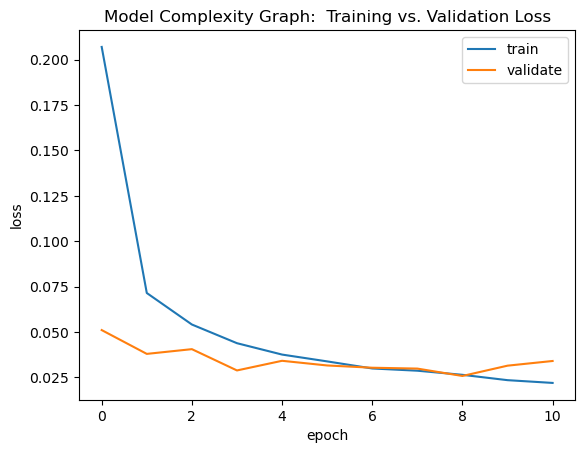

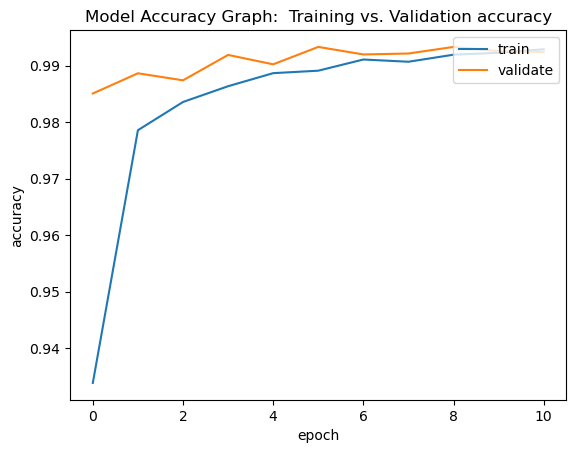

In [14]:
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

## Prediction on Test data

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0246 - accuracy: 0.9939
0.9939000010490417


3/3 [==============================] - 0s 11ms/step


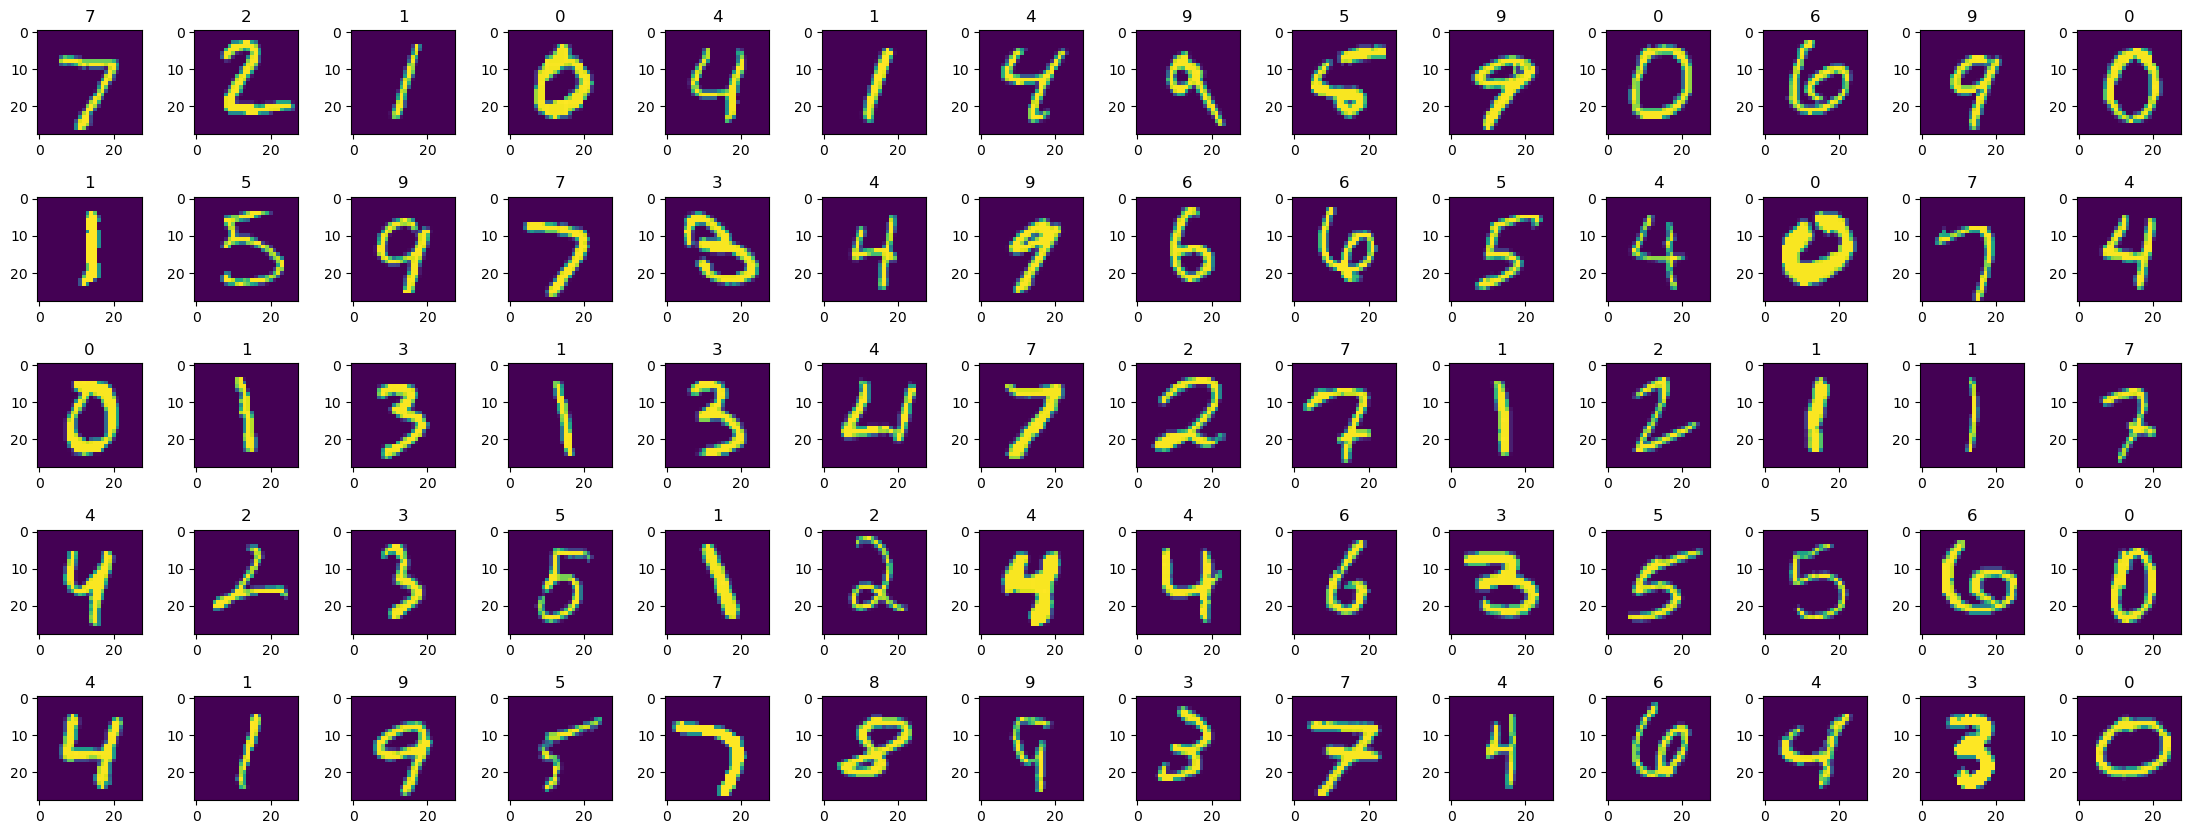

In [16]:
# predicted class
num_rows = 5
num_cols = 14
sample_size = num_rows * num_cols
indices = np.arange(sample_size)
x_pred = x_test[indices,:,:]
predictions = model.predict(x_pred)
x_pred = np.squeeze(x_test[indices,:,:])
y_pred = np.argmax(predictions,axis=1)

num_images = num_rows*num_cols
plt.figure(figsize=(num_cols*2, num_rows*2))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plt.imshow(x_pred[i])
  plt.title(classes[y_pred[i]])


In [17]:
export_path = 'model/cnn_mnist'
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    
    )

export_path = model/cnn_mnist



In [19]:
#model = tf.keras.models.load_model(export_path)

! zip -r /kaggle/working/model.zip /kaggle/working/model/

  adding: kaggle/working/model/ (stored 0%)
  adding: kaggle/working/model/cnn_mnist/ (stored 0%)
  adding: kaggle/working/model/cnn_mnist/variables/ (stored 0%)
  adding: kaggle/working/model/cnn_mnist/variables/variables.index (deflated 65%)
  adding: kaggle/working/model/cnn_mnist/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: kaggle/working/model/cnn_mnist/assets/ (stored 0%)
  adding: kaggle/working/model/cnn_mnist/keras_metadata.pb (deflated 92%)
  adding: kaggle/working/model/cnn_mnist/fingerprint.pb (stored 0%)
  adding: kaggle/working/model/cnn_mnist/saved_model.pb (deflated 89%)


In [20]:
import os
from IPython.display import FileLink
os.chdir(r'/kaggle/working')
FileLink(r'model.zip')

/kaggle/working/model.zip